In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'f6b6960d8ade48dc8278f0f7788dc041' }).json()
        return json
    except:
        json
        return None

In [4]:
table = call_api('http://api.football-data.org/v1/competitions/426/leagueTable', 'table')
table

{'_links': {'competition': {'href': 'http://api.football-data.org/v1/competitions/426'},
  'self': {'href': 'http://api.football-data.org/v1/competitions/426/leagueTable/?matchday=38'}},
 'leagueCaption': 'Premier League 2016/17',
 'matchday': 38,
 'standing': [{'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/61'}},
   'away': {'draws': 3,
    'goals': 30,
    'goalsAgainst': 16,
    'losses': 3,
    'wins': 13},
   'crestURI': 'http://upload.wikimedia.org/wikipedia/de/5/5c/Chelsea_crest.svg',
   'draws': 3,
   'goalDifference': 52,
   'goals': 85,
   'goalsAgainst': 33,
   'home': {'draws': 0,
    'goals': 55,
    'goalsAgainst': 17,
    'losses': 2,
    'wins': 17},
   'losses': 5,
   'playedGames': 38,
   'points': 93,
   'position': 1,
   'teamName': 'Chelsea FC',
   'wins': 30},
  {'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/73'}},
   'away': {'draws': 6,
    'goals': 39,
    'goalsAgainst': 17,
    'losses': 4,
    'wins': 9},
   'crestUR

In [5]:
team_pd = []
for i in table['standing']:
    team_pd.append({'name': i['teamName'], 'losses': i['losses']})
team_pd

[{'losses': 5, 'name': 'Chelsea FC'},
 {'losses': 4, 'name': 'Tottenham Hotspur FC'},
 {'losses': 6, 'name': 'Manchester City FC'},
 {'losses': 6, 'name': 'Liverpool FC'},
 {'losses': 9, 'name': 'Arsenal FC'},
 {'losses': 5, 'name': 'Manchester United FC'},
 {'losses': 11, 'name': 'Everton FC'},
 {'losses': 16, 'name': 'Southampton FC'},
 {'losses': 16, 'name': 'AFC Bournemouth'},
 {'losses': 17, 'name': 'West Bromwich Albion FC'},
 {'losses': 17, 'name': 'West Ham United FC'},
 {'losses': 18, 'name': 'Leicester City FC'},
 {'losses': 16, 'name': 'Stoke City FC'},
 {'losses': 21, 'name': 'Crystal Palace FC'},
 {'losses': 21, 'name': 'Swansea City FC'},
 {'losses': 20, 'name': 'Burnley FC'},
 {'losses': 20, 'name': 'Watford FC'},
 {'losses': 22, 'name': 'Hull City FC'},
 {'losses': 20, 'name': 'Middlesbrough FC'},
 {'losses': 26, 'name': 'Sunderland AFC'}]

In [6]:
teams_pd = pd.DataFrame(team_pd)
teams_pd = teams_pd.sort_values(by='name')
teams_pd

,losses,name
8,16,AFC Bournemouth
4,9,Arsenal FC
15,20,Burnley FC
0,5,Chelsea FC
13,21,Crystal Palace FC
6,11,Everton FC
17,22,Hull City FC
11,18,Leicester City FC
3,6,Liverpool FC
2,6,Manchester City FC


In [7]:
price = [103957216, 265000000, 81473963, 335000000, 97056415, 130000000, 81473963, 110000000, 205000000, 410000000, 365000000, 77000000, 95000000, 79000000, 100000000, 60500000, 235000000, 70000000, 63000000, 61000000
]
price_pd = pd.DataFrame(price, columns = ['price'])
teams_pd.index = price_pd.index
teams_pd = teams_pd.join(price_pd)

In [8]:
del teams_pd['name']
teams_pd

,losses,price
0,16,103957216
1,9,265000000
2,20,81473963
3,5,335000000
4,21,97056415
5,11,130000000
6,22,81473963
7,18,110000000
8,6,205000000
9,6,410000000


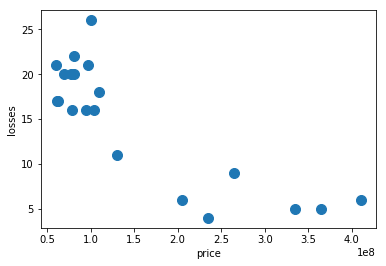

In [9]:
teams_pd.plot.scatter(x='price', y='losses', s=100)

In [10]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 2.42424242,  0.96189715],
       [ 1.36363636,  2.45199664],
       [ 3.03030303,  0.75386371],
       [ 0.75757576,  3.09969387],
       [ 3.18181818,  0.8980453 ],
       [ 1.66666667,  1.20286628],
       [ 3.33333333,  0.75386371],
       [ 2.72727273,  1.01780993],
       [ 0.90909091,  1.89682759],
       [ 0.90909091,  3.79365519],
       [ 0.75757576,  3.3772784 ],
       [ 3.03030303,  0.71246695],
       [ 2.42424242,  0.87901766],
       [ 2.42424242,  0.73097258],
       [ 3.93939394,  0.92528175],
       [ 3.18181818,  0.55979546],
       [ 0.60606061,  2.17441212],
       [ 3.03030303,  0.64769723],
       [ 2.57575758,  0.5829275 ],
       [ 2.57575758,  0.56442187]])

In [11]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 0.88383838,  2.7989773 ],
        [ 1.66666667,  1.20286628],
        [ 2.91375291,  0.76831237]]),
 array([2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2]))

In [12]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

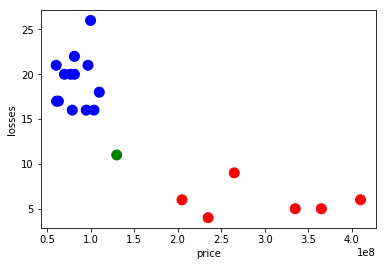

In [13]:
teams_pd.plot.scatter(x='price', y='losses', c=colors, s=100)

In [14]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 1.66666667,  1.20286628],
        [ 2.52525253,  0.78950778],
        [ 2.37769868,  1.35131454],
        [ 0.88383838,  2.7989773 ],
        [ 3.24675325,  0.75014487]]),
 array([1, 3, 4, 3, 4, 0, 4, 1, 3, 3, 3, 4, 1, 1, 4, 4, 3, 4, 1, 1]))

In [15]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

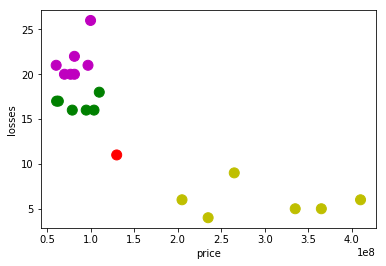

In [16]:
teams_pd.plot.scatter(x='price', y='losses', c=colors, s=100)